## K-means Clustering Algorithm Implementation

In [1]:
## importing required libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

In [33]:
X, y = make_blobs(n_samples=2000, centers=5, n_features=5)

In [34]:
X

array([[  3.20926768,  -1.56439707,  -9.13850403,  -0.82754893,
          9.4894111 ],
       [  1.67808423,  -2.3074405 ,  -7.10698779,  -0.62450375,
         11.46670078],
       [  6.71590546,  -9.14800304,   9.85313341,   7.80519692,
         -1.50646855],
       ...,
       [  8.69259133,  -8.97141323,   9.87320046,   8.20960067,
         -1.27536679],
       [  6.95473423, -10.10490831,   6.81150933,   7.65974293,
         -0.3375159 ],
       [  2.25965343,  -1.1281424 ,  -8.00504458,  -2.27999365,
          8.73505366]], shape=(2000, 5))

In [35]:
y

array([2, 2, 1, ..., 1, 1, 2], shape=(2000,))

In [36]:
X.shape

(2000, 5)

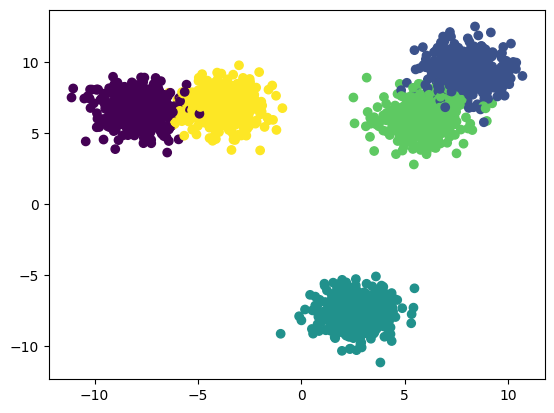

In [37]:
plt.scatter(X[:, 0], X[:, 2], c=y)

We are getting 3 different colored plots because we have used n_clusters = 3

In [38]:
## standarization - feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [40]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
from sklearn.cluster import KMeans

In [42]:
## Elbow method to select K value
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [43]:
wcss

[8000.000000000001,
 4401.954749058489,
 2002.3206906336943,
 683.4586244346791,
 676.5623605739094,
 233.91059034412723,
 226.3788836829746,
 218.38279639856066,
 215.32528589963027,
 205.3616053415017]

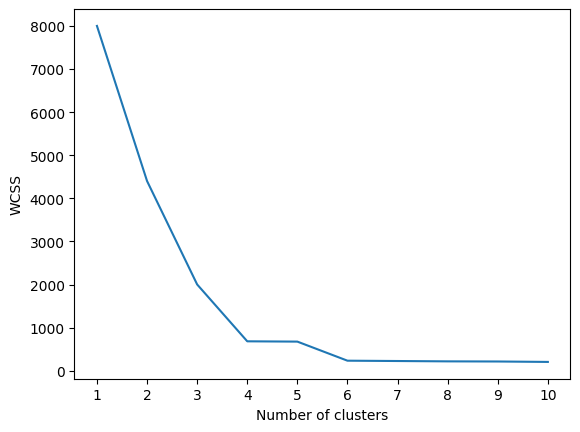

In [44]:
## plotting the elbow curve
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [46]:
kmeans = KMeans(n_clusters=3, init="k-means++")

In [47]:
kmeans.fit_predict(X_train_scaled)

array([0, 0, 1, ..., 0, 0, 0], shape=(1600,), dtype=int32)

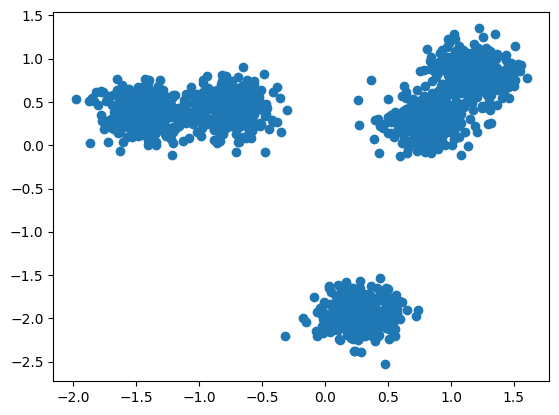

In [52]:
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 2])

Now we'll validate the k values. To validate the k values, we'll use two methods -  
1- Kneelocator  
2- Silhoutee scoring

In [53]:
!pip install kneed

In [54]:
## validating the k values
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")

In [55]:
kl.elbow

np.int64(4)

In [65]:
## silhoutee scoring
from sklearn.metrics import silhouette_score
silhouetee_coefficients=[]

s = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X_train_scaled)

    score = silhouette_score(X_train_scaled, kmeans.labels_)
    s.append(score)

In [69]:
s

[np.float64(0.47308678552949557),
 np.float64(0.5613521088287142),
 np.float64(0.7476923327885271),
 np.float64(0.7653876335135318),
 np.float64(0.6316359882996013),
 np.float64(0.5215306211226196),
 np.float64(0.4150033481069636),
 np.float64(0.4109384227554591),
 np.float64(0.25498723002775353)]

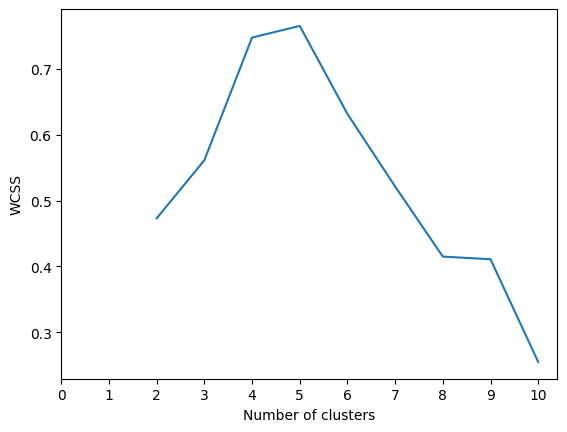

In [72]:
## plotting the elbow curve
plt.plot(range(2, 11), s)
plt.xticks(range(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()